In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv(r"C:\Users\Mihir Patel\Downloads\archive (2)\twitter_training.csv")

In [7]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [19]:
df.rename(columns={'Positive': 'category'}, inplace=True)
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text'}, inplace=True)
df.isnull().sum()
df.shape
df["2401"].value_counts() 
df["category"].value_counts()

category
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [36]:
df.head()

,2401,Borderlands,category,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [32]:
category_counts=df['category'].value_counts()
category_counts

category
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_11664\1630136741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Borderlands",data=df,palette="turbo")


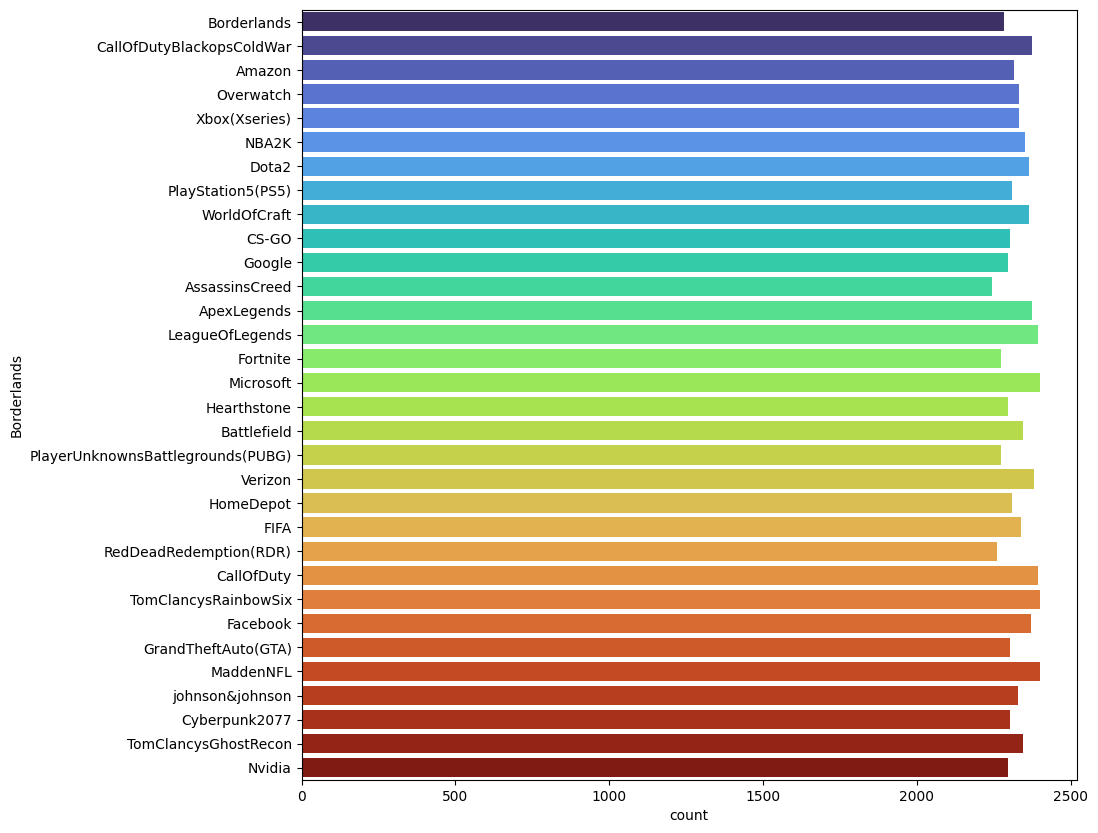

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(y="Borderlands",data=df,palette="turbo")
plt.show()

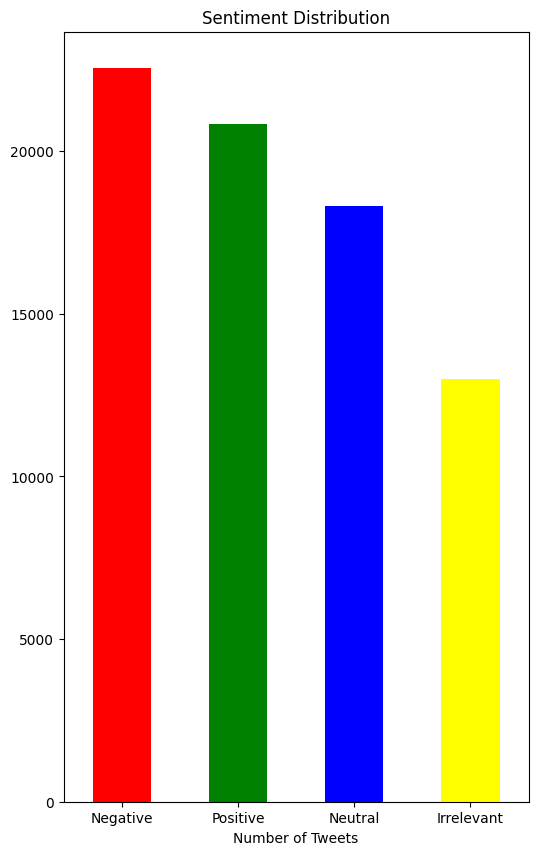

In [34]:
plt.figure(figsize=(6,10))
category_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [38]:
brand_data=df[df['Borderlands'].str.contains('Microsoft',case=False)]
brand_category_counts=brand_data['category'].value_counts()
brand_category_counts

category
Neutral       846
Negative      774
Positive      606
Irrelevant    174
Name: count, dtype: int64

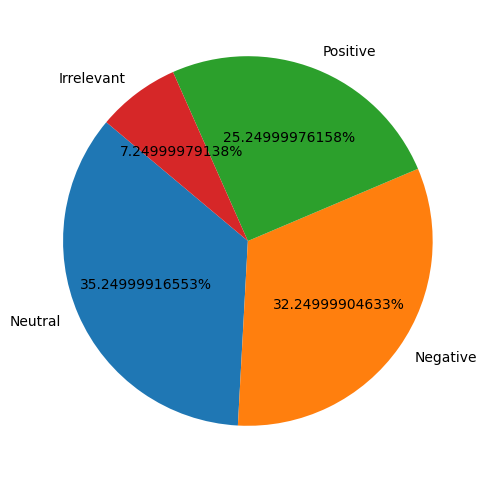

In [39]:
plt.figure(figsize=(6,6))
plt.pie(brand_category_counts,labels=brand_category_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()

In [64]:
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
import nltk.downloader
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.downloader

[nltk_data] Downloading package stopwords to C:\Users\Mihir
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Mihir
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


<module 'nltk.downloader' from 'c:\\Users\\Mihir Patel\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\nltk\\downloader.py'>

In [65]:
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Remove special characters and digits
        text = re.sub(r"[^a-zA-Z]", " ", text)

        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))

        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Convert to lowercase
        text = text.lower()

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        text = ' '.join(tokens)

        return text
    else:
        # If the text is not a string (NaN or other), return an empty string
        return ""

In [66]:
df["text"]=df["text"].apply(clean_text)

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_11664\1050217019.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


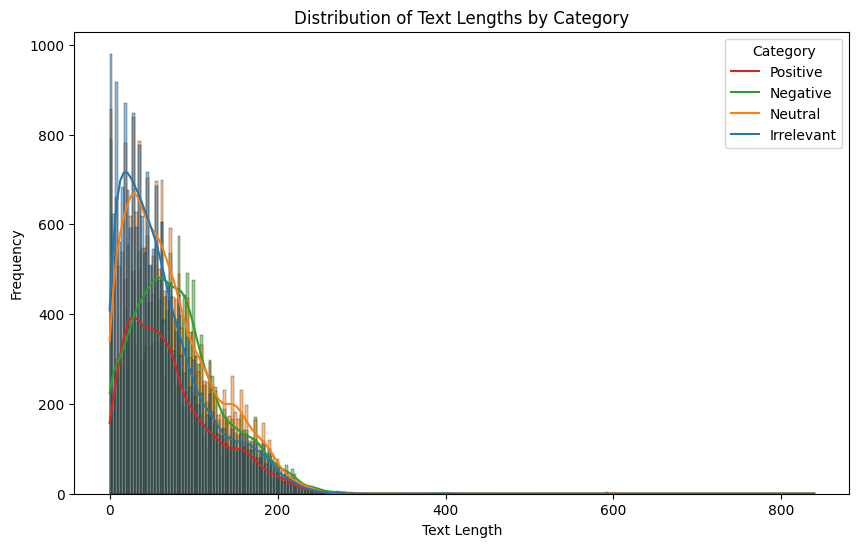

In [67]:
p_len=df[df["category"]=="Positive"]["text"].str.len()
n_len=df[df["category"]=="Negative"]["text"].str.len()
neu_len=df[df["category"]=="Neutral"]["text"].str.len()
irr_len=df[df["category"]=="Irrelevant"]["text"].str.len()
lengths_df = pd.DataFrame({
    "Positive": p_len,
    "Negative": n_len,
    "Neutral": neu_len,
    "Irrelevant": irr_len
})

plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, kde=True)
plt.title('Distribution of Text Lengths by Category')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Category', labels=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.show()

In [70]:
df["character_count"]=df["text"].str.len()
df["word_count"]=df['text'].str.split() .str.len()

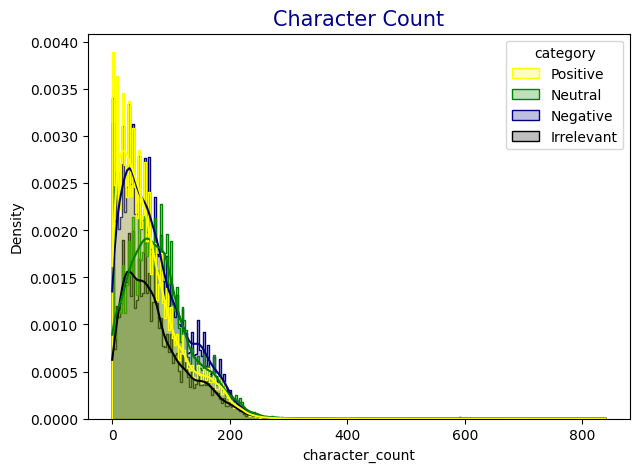

In [71]:
color=["yellow","green","navy","black"]
plt.figure(figsize=(7,5))

sns.histplot(data=df,x="character_count",palette=color,kde=True,hue="category",element="step",stat="density")
plt.title("Character Count",fontsize=15,color="darkblue")
plt.show()

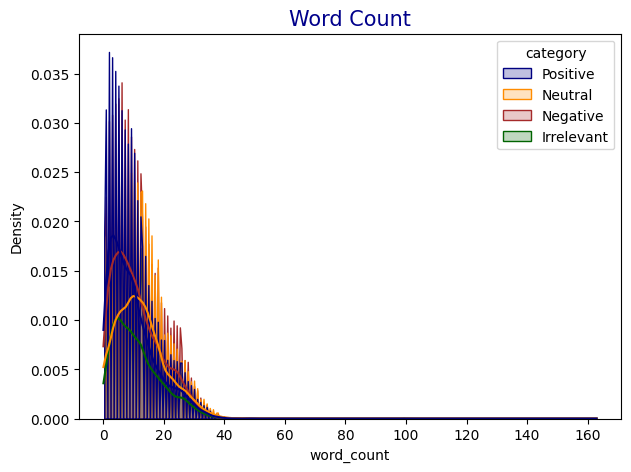

In [72]:
color=["navy","darkorange","brown","darkgreen"]
plt.figure(figsize=(7,5))

sns.histplot(data=df,x="word_count",palette=color,kde=True,hue="category",element="poly",stat="density")
plt.title("Word Count",fontsize=15,color="darkblue")
plt.show()